In [9]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
import warnings
warnings.filterwarnings('ignore')


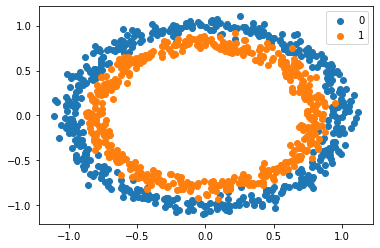

In [10]:
from sklearn.datasets import make_circles 
#generate the dataset 
X, y= make_circles(n_samples=1000, noise=0.05, random_state=1) 
#select indices ofpoints with each class label 
for i in range(2):
    samples_ix= np.where(y==i)
    plt.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
    
plt.legend()
plt.show()


In [11]:
def sigmoid(X):
    return 1/(1+np.exp(-X))
def relu(X):
    return np.maximum(0,X)


In [12]:
def forwardPass(X, parametres):
    W1 ,W2, b1, b2= parametres["W1"],parametres["W2"], parametres["b1"], parametres["b2"]
    Z1= np.dot(X, W1.T)+b1.T
    A1=sigmoid(Z1)
    Z2=np.dot(A1, W2.T)+b2.T
    A2=sigmoid(Z2)
    return A2

In [13]:
# Testing the forward pass 
# I nitializing the weights randomly
W1=np.array([[2, 3], [0.5, -5]])
b1= np.array([[1], [-2]])
W2=np.array([[0.1,-4.5]])
b2=np.array([[0]])

parametres={"W1": W1,"b1":b1,"W2": W2, "b2":b2}
#pcking a data point 
X_1= X[1]
#Executing the forward pass
A2= forwardPass(X_1, parametres)

#printing results
print ("output", A2)
print("prediction", (A2>0.5)*1.0)
print("Target", y[0])




output [[0.03266079]]
prediction [[0.]]
Target 1


## Weight Initialization 

In [14]:
# Initializing with some random values
def InitializeParametersRandom(inputSize, hiddenLayerSize, outputSize):
    w1= np.random.randn(hiddenLayerSize, inputSize)* 1e-6
    w2=np.randomn.randn(outputSize, hiddenLayerSize)  *1e-6
    b1= np.zeros((hiddenLayerSize, 1))
    b2= np.zeros((outputSize,1) )   
    parameters={"w1":w1, "b1":b1, "w2": w2, "b2": b2}
    return parameters 

In [49]:
# He Initialization
def InitializeParametersHe(inputSize, hiddenLayerSize, outputSize):
    w1= np.random.randn(hiddenLayerSize, inputSize)* np.sqrt(2/inputSize)
    w2=np.random.randn(outputSize, hiddenLayerSize)  *np.sqrt(2/hiddenLayerSize)
    b1= np.zeros((hiddenLayerSize, 1))
    b2= np.zeros((outputSize,1) )   
    parameters={"w1":w1, "b1":b1, "w2": w2, "b2": b2}
    return parameters 

In [50]:
#preparing our data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=1) 

In [51]:
y_train.reshape((-1, 1))
y_test.reshape((-1, 1))

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
    

In [52]:
hiddenLayerSize= 10 #number of hidder layer neurons (2)
inputSize= X_train.shape[0] # number of input features(2)
outputSize= y_train.shape[0] # number of output features (1)

In [53]:
#import python_utils
#python install utils
#pip install jupyter_utils
#python -m pip install utils
#import Utils

from Utils_initialization import forwardPass, fit 
# frowrardPass calculates the cost 

ModuleNotFoundError: No module named 'Utils_initialization'

We will use the He initilization and we will train it for 10000 effects  

In [55]:
parameters_1= InitializeParametersHe(inputSize, hiddenLayerSize, outputSize)
parameters_1= fit(X_train, y_train, 10000, 0.1, parameters_1)

NameError: name 'fit' is not defined

In [56]:
# Evaluate the model that was initalized with He initialization 
from sklearn.metrics import accuracy_score
_, _, A2= forwardPass(X_test, y_test, parameters_1)
y_test_classes= y_test
y_pred_classes= [1 if a>0.5 else 0 for a in A2]
print("Accuracy =", accuracy_score(y_test_classes, y_pred_classes))

TypeError: forwardPass() takes 2 positional arguments but 3 were given

Now we will initialize its weights with some random values using Random Initialization

In [57]:
parameters_1= InitializeParametersRandom(inputSize, hiddenLayerSize, outputSize)
parameters_1= fit(X_train, y_train, 10000, 0.1, parameters_1)
# Evaluate the model that was initalized with He initialization 
_, _, A2= forwardPass(X_test, y_test, parameters_1)
y_test_classes= y_test
y_pred_classes= [1 if a>0.5 else 0 for a in A2]
print("Accuracy =", accuracy_score(y_test_classes, y_pred_classes))

AttributeError: module 'numpy' has no attribute 'randomn'

The model couldn't learn because we haven't initialize our weights properly, this shows the importance of initialization methods in neural networks 